In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

# 일별 발전량 예측하기



## 데이터 불러오기

In [67]:
data_date= pd.read_csv('data/일별전처리된기상+발전(결측값X미세먼지).csv', encoding='euc-kr')
data_date.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),합계 일조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),일 미세먼지 농도(㎍/㎥),발전량
0,108,서울시,2014-01-01,4.0,0.3,7.9,0.0,-5.5,51.3,1003.6,6.4,6.17,2.1,1.9,0.8,125.0,16.838120
1,108,서울시,2014-01-02,1.5,-1.3,6.2,0.0,-12.9,35.4,1010.4,9.0,9.18,0.3,0.0,0.0,56.0,23.137138
2,108,서울시,2014-01-03,2.3,-1.1,7.3,0.0,-6.2,54.4,1006.9,2.7,4.69,4.6,2.0,0.1,59.0,10.690824
3,108,서울시,2014-01-04,-0.1,-3.7,5.6,0.0,-10.3,47.1,1008.8,8.7,8.14,0.9,0.5,-0.2,51.0,19.385421
4,108,서울시,2014-01-05,-0.8,-4.3,3.8,0.0,-10.7,48.4,1013.1,8.0,7.08,2.1,1.9,-0.7,45.0,15.981089


## 상관관계 확인하기

<AxesSubplot:>

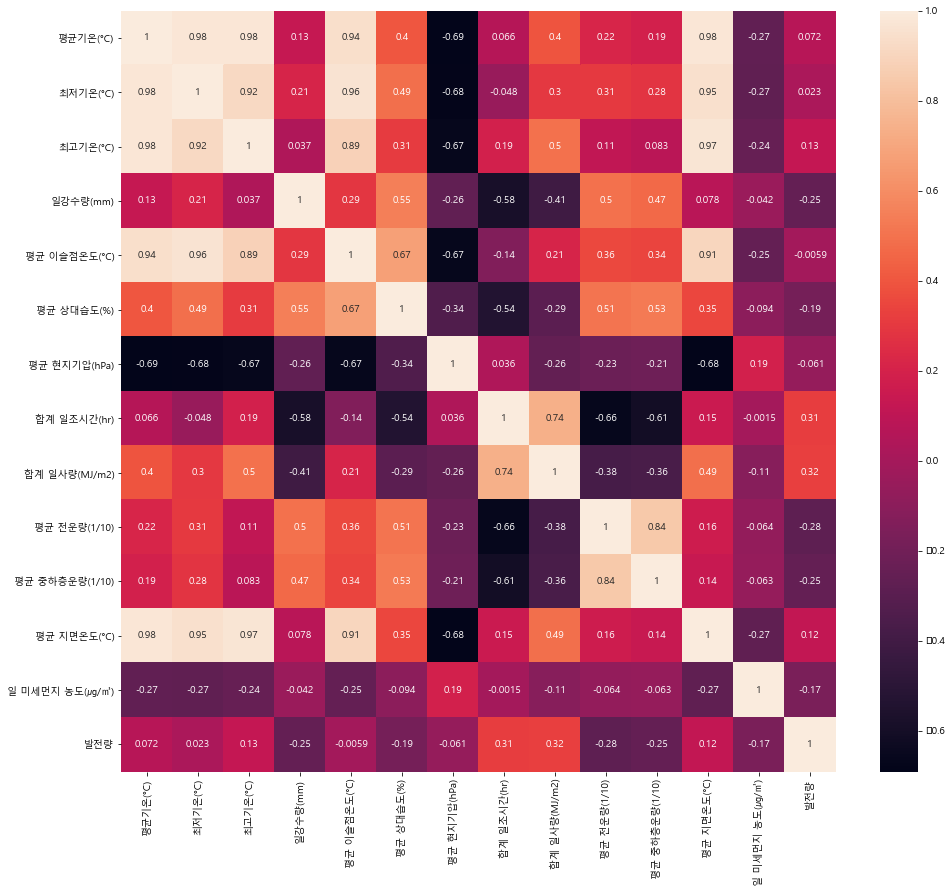

In [68]:
plt.figure(figsize=(16,14))
sns.heatmap(data_date.iloc[:,3:].corr(method='spearman'), annot=True)

## 필요없는 컬럼 삭제

In [69]:
del data_date['지점']
del data_date['일시']
data_date

,지점명,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),합계 일조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),일 미세먼지 농도(㎍/㎥),발전량
0,서울시,4.0,0.3,7.9,0.0,-5.5,51.3,1003.6,6.4,6.17,2.1,1.9,0.8,125.0,16.838120
1,서울시,1.5,-1.3,6.2,0.0,-12.9,35.4,1010.4,9.0,9.18,0.3,0.0,0.0,56.0,23.137138
2,서울시,2.3,-1.1,7.3,0.0,-6.2,54.4,1006.9,2.7,4.69,4.6,2.0,0.1,59.0,10.690824
3,서울시,-0.1,-3.7,5.6,0.0,-10.3,47.1,1008.8,8.7,8.14,0.9,0.5,-0.2,51.0,19.385421
4,서울시,-0.8,-4.3,3.8,0.0,-10.7,48.4,1013.1,8.0,7.08,2.1,1.9,-0.7,45.0,15.981089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38459,경상북도,22.1,19.8,24.8,3.4,20.1,88.6,993.5,0.0,8.59,9.8,6.0,24.0,31.0,691.508631
38460,경상북도,22.1,20.7,24.2,17.7,20.5,91.1,995.5,0.0,5.01,9.8,8.5,23.4,31.0,431.084541
38461,경상북도,22.4,21.1,23.8,16.6,21.1,92.3,997.6,0.0,4.59,10.0,7.9,23.9,31.0,377.922383
38462,경상북도,22.4,20.8,25.9,65.2,21.1,92.6,998.4,1.0,5.48,8.9,7.0,23.9,31.0,479.613574


## one-hot encoding(지점명)

In [70]:
df_one = pd.get_dummies(data_date)
df_one

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),합계 일조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),...,지점명_대전시,지점명_부산시,지점명_서울시,지점명_울산시,지점명_인천시,지점명_전라남도,지점명_전라북도,지점명_제주도,지점명_충청남도,지점명_충청북도
0,4.0,0.3,7.9,0.0,-5.5,51.3,1003.6,6.4,6.17,2.1,...,0,0,1,0,0,0,0,0,0,0
1,1.5,-1.3,6.2,0.0,-12.9,35.4,1010.4,9.0,9.18,0.3,...,0,0,1,0,0,0,0,0,0,0
2,2.3,-1.1,7.3,0.0,-6.2,54.4,1006.9,2.7,4.69,4.6,...,0,0,1,0,0,0,0,0,0,0
3,-0.1,-3.7,5.6,0.0,-10.3,47.1,1008.8,8.7,8.14,0.9,...,0,0,1,0,0,0,0,0,0,0
4,-0.8,-4.3,3.8,0.0,-10.7,48.4,1013.1,8.0,7.08,2.1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38459,22.1,19.8,24.8,3.4,20.1,88.6,993.5,0.0,8.59,9.8,...,0,0,0,0,0,0,0,0,0,0
38460,22.1,20.7,24.2,17.7,20.5,91.1,995.5,0.0,5.01,9.8,...,0,0,0,0,0,0,0,0,0,0
38461,22.4,21.1,23.8,16.6,21.1,92.3,997.6,0.0,4.59,10.0,...,0,0,0,0,0,0,0,0,0,0
38462,22.4,20.8,25.9,65.2,21.1,92.6,998.4,1.0,5.48,8.9,...,0,0,0,0,0,0,0,0,0,0


In [71]:
## X,y로 분리


df_y = df_one['발전량']
df_X = df_one
del df_X['발전량']
df_X

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),합계 일조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),...,지점명_대전시,지점명_부산시,지점명_서울시,지점명_울산시,지점명_인천시,지점명_전라남도,지점명_전라북도,지점명_제주도,지점명_충청남도,지점명_충청북도
0,4.0,0.3,7.9,0.0,-5.5,51.3,1003.6,6.4,6.17,2.1,...,0,0,1,0,0,0,0,0,0,0
1,1.5,-1.3,6.2,0.0,-12.9,35.4,1010.4,9.0,9.18,0.3,...,0,0,1,0,0,0,0,0,0,0
2,2.3,-1.1,7.3,0.0,-6.2,54.4,1006.9,2.7,4.69,4.6,...,0,0,1,0,0,0,0,0,0,0
3,-0.1,-3.7,5.6,0.0,-10.3,47.1,1008.8,8.7,8.14,0.9,...,0,0,1,0,0,0,0,0,0,0
4,-0.8,-4.3,3.8,0.0,-10.7,48.4,1013.1,8.0,7.08,2.1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38459,22.1,19.8,24.8,3.4,20.1,88.6,993.5,0.0,8.59,9.8,...,0,0,0,0,0,0,0,0,0,0
38460,22.1,20.7,24.2,17.7,20.5,91.1,995.5,0.0,5.01,9.8,...,0,0,0,0,0,0,0,0,0,0
38461,22.4,21.1,23.8,16.6,21.1,92.3,997.6,0.0,4.59,10.0,...,0,0,0,0,0,0,0,0,0,0
38462,22.4,20.8,25.9,65.2,21.1,92.6,998.4,1.0,5.48,8.9,...,0,0,0,0,0,0,0,0,0,0


## 데이터 전처리(스케일링)

In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mm = MinMaxScaler()
ss = StandardScaler()

ss.fit(df_X)
mm.fit(df_X)

df_X_ss = pd.DataFrame(ss.transform(df_X), columns = df_X.columns)
df_X_mm = pd.DataFrame(mm.transform(df_X), columns = df_X.columns)

## 발전량 예측하는 model 생성 및 리포트 작성 함수

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import ARDRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

lr = LinearRegression()


def my_regressor(x,y):
    regressors = [
        LinearRegression(),
        Ridge(), Lasso(), ElasticNet(),
        ARDRegression(), BayesianRidge(),
        RandomForestRegressor(),
        XGBRegressor()
    ]
    
    log_cols=["Classifier","Score","MSE"]
    log = pd.DataFrame(columns=log_cols)
    
    #acc_dict = {}
    mse_dict = {}
    score_dict = {}
    
    for i in range(10):
        X_train, X_test,y_train, y_test = train_test_split(x,y,random_state=2020)
    
        for reg in regressors:
            name = reg.__class__.__name__
            reg.fit(X_train, y_train)
            train_predictions = reg.predict(X_test)
            Score = reg.score(X_test,y_test)
            MSE = mean_squared_error(y_test, train_predictions)
            if name in mse_dict:
                mse_dict[name] += MSE
            else:
                mse_dict[name] = MSE
            if name in score_dict:
                score_dict[name] += Score
            else:
                score_dict[name] = Score
                
    for reg in mse_dict:
        score_dict[reg] = score_dict[reg] / 10.0
        mse_dict[reg] = mse_dict[reg] / 10.0
        log_entry = pd.DataFrame([[reg, score_dict[reg], mse_dict[reg]]], columns=log_cols)
        log = log.append(log_entry) 
        
    log = log.sort_values(by=['Score'], axis=0)
    
    
    return log, regressors

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_X_ss, df_y, test_size=0.3, random_state=2021)

log, reg_list_date = my_regressor(X_train, y_train)
print(log)

              Classifier     Score            MSE
0             ElasticNet  0.572808  195958.915570
0                  Lasso  0.646844  161997.661435
0          ARDRegression  0.647252  161810.662199
0          BayesianRidge  0.647305  161786.084050
0                  Ridge  0.647321  161778.689519
0       LinearRegression  0.647323  161778.222446
0           XGBRegressor  0.879176   55423.725299
0  RandomForestRegressor  0.881698   54266.890100


In [75]:
X_train, X_test, y_train, y_test = train_test_split(df_X_mm, df_y, test_size=0.3, random_state=0)

log, reg_list_date = my_regressor(X_train, y_train)
print(log)

              Classifier     Score            MSE
0             ElasticNet  0.154648  352810.290061
0                  Lasso  0.655054  143964.319609
0          ARDRegression  0.660148  141838.108915
0       LinearRegression  0.660241  141799.472660
0          BayesianRidge  0.660327  141763.320099
0                  Ridge  0.660369  141746.064670
0           XGBRegressor  0.874160   52519.557469
0  RandomForestRegressor  0.881659   49390.121610


In [76]:
# 하나 뽑아서 확인해 보기
reg_list_date[-1].score(X_test, y_test)

0.8815250397114349

## 특성 중요도 확인하기(RandomForest, XGB)

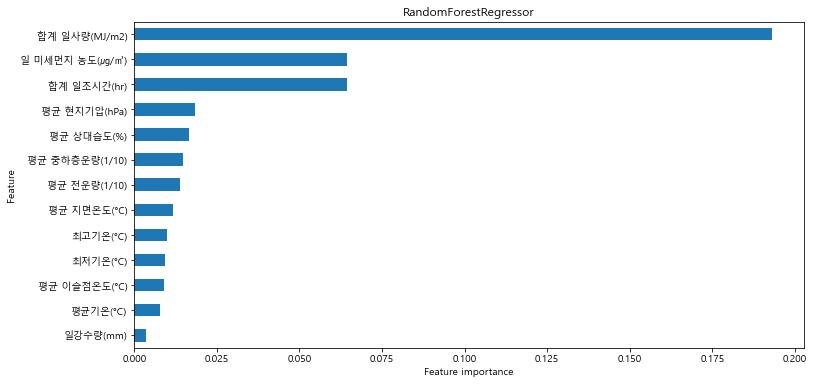

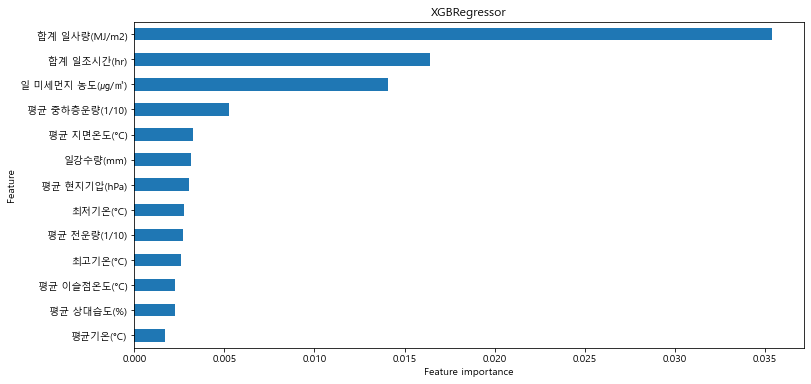

In [77]:
from pandas import Series

tree_list_date = reg_list_date[-2:]

for i in tree_list_date:
    feature_importance = i.feature_importances_
    Series_feat_imp = Series(feature_importance, index=X_test.columns)

    for col in X_test.columns:
        if '지점명' in col:
            del Series_feat_imp[col]

    plt.figure(figsize=(12, 6))
    Series_feat_imp.sort_values(ascending=True).plot.barh()
    plt.title(i.__class__.__name__)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()

# 월별 데이터 불러오기 & 상관관계 확인

In [14]:
data_avg = pd.read_excel('data/월별 기상_발전.xlsx')
data_avg.head()

,지역,일시,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균 이슬점온도(°C),평균풍속(m/s),평균현지기압(hPa),평균상대습도(%),합계일조시간(hr),합계일사량(MJ/㎡),PM2.5(μg/m³),PM10(μg/m³),월별발전량,발전량/수 평균,설비용량 합계,발전소수,발전량/용량 평균
0,강원도,2014-01-01,-1.3,3.9,-6.4,301.9,-10.677419,1.8,1020.2,69,200.9,278.04,27,66,4533.504911,29.825690,47.153555,152,96.143438
1,강원도,2014-02-01,-0.1,5.2,-4.7,976.2,-7.710714,1.6,1023.6,79,180.3,323.37,27,60,5679.163157,37.362916,47.153555,152,120.439767
2,강원도,2014-03-01,6.3,12.2,0.4,416.6,-0.200000,2.2,1016.3,64,225.4,464.73,27,68,7829.053792,51.506933,47.153555,152,166.033161
3,강원도,2014-04-01,12.4,18.8,6.4,1177.8,5.116667,2.0,1014.5,66,220.5,534.07,27,66,8386.391866,55.173631,47.153555,152,177.852802
4,강원도,2014-05-01,17.9,24.6,11.5,465.2,9.793548,2.4,1006.5,62,304.5,730.50,27,67,10853.617328,71.405377,47.153555,152,230.176014


<AxesSubplot:>

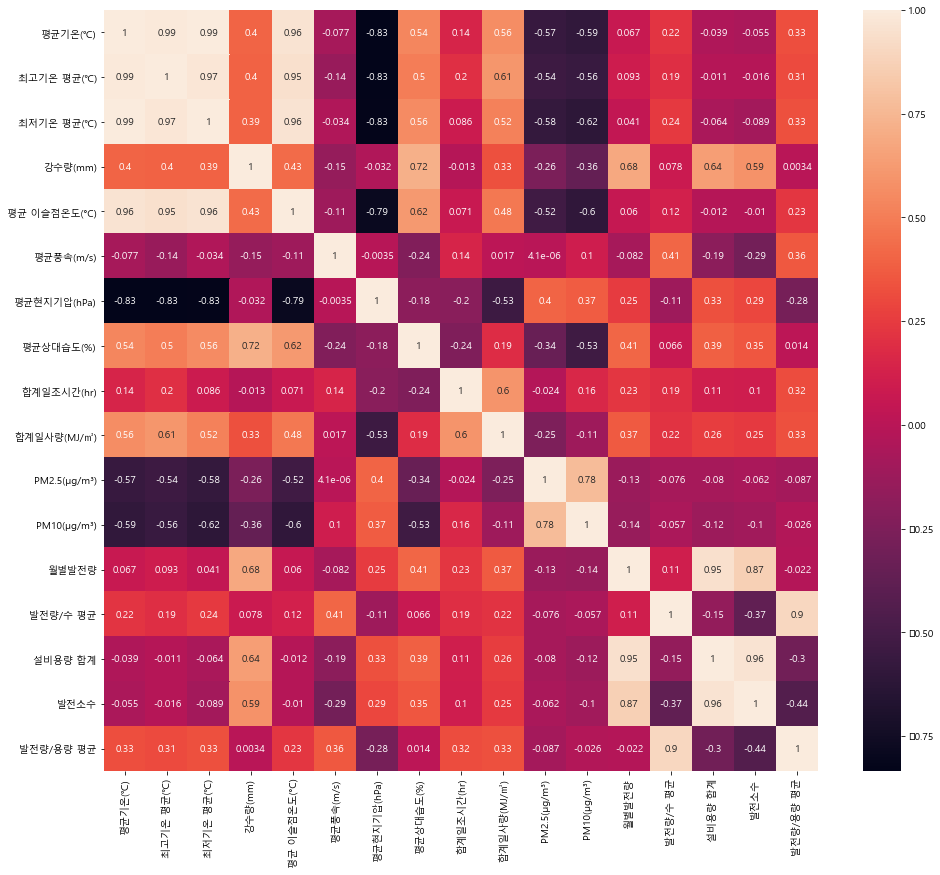

In [15]:
plt.figure(figsize=(16,14))
sns.heatmap(data_avg.corr(method='spearman'), annot=True)

In [16]:
# 지역 컬럼을 미리 담아놓기
region = data_avg['지역']

## 필요 없는 컬럼 삭제

In [17]:
del data_avg['지역']
del data_avg['일시']
del data_avg['발전량/수 평균']
del data_avg['발전량/용량 평균']
del data_avg['발전소수']

## X,y 나누기 & 스케일링

In [18]:
y = data_avg['월별발전량']
X = data_avg.copy()
del X['월별발전량']
X

,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균 이슬점온도(°C),평균풍속(m/s),평균현지기압(hPa),평균상대습도(%),합계일조시간(hr),합계일사량(MJ/㎡),PM2.5(μg/m³),PM10(μg/m³),설비용량 합계
0,-1.3,3.9,-6.4,301.9,-10.677419,1.8,1020.2,69,200.9,278.04,27,66,47.153555
1,-0.1,5.2,-4.7,976.2,-7.710714,1.6,1023.6,79,180.3,323.37,27,60,47.153555
2,6.3,12.2,0.4,416.6,-0.200000,2.2,1016.3,64,225.4,464.73,27,68,47.153555
3,12.4,18.8,6.4,1177.8,5.116667,2.0,1014.5,66,220.5,534.07,27,66,47.153555
4,17.9,24.6,11.5,465.2,9.793548,2.4,1006.5,62,304.5,730.50,27,67,47.153555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,7.0,13.9,0.0,102.6,-2.032258,1.9,1011.1,62,244.1,539.12,26,43,589.043453
1260,10.2,17.3,2.9,146.1,-1.150000,2.3,1010.5,56,286.3,654.61,21,43,589.043453
1261,17.6,23.6,12.0,459.5,10.264516,1.8,1003.5,72,229.5,651.87,19,33,589.043453
1262,23.0,28.5,18.2,690.6,15.653333,1.5,999.5,75,204.0,619.12,26,41,589.043453


In [19]:
mm = MinMaxScaler()
mm.fit(X)

X_mm = pd.DataFrame(mm.transform(X), columns = X.columns)

In [20]:
X_mm

,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균 이슬점온도(°C),평균풍속(m/s),평균현지기압(hPa),평균상대습도(%),합계일조시간(hr),합계일사량(MJ/㎡),PM2.5(μg/m³),PM10(μg/m³),설비용량 합계
0,0.108824,0.131195,0.093220,0.033940,0.082552,0.200000,0.793443,0.500000,0.480790,0.201566,0.315789,0.676471,0.020843
1,0.144118,0.169096,0.141243,0.109746,0.157572,0.155556,0.904918,0.666667,0.405415,0.254923,0.315789,0.588235,0.020843
2,0.332353,0.373178,0.285311,0.046835,0.347500,0.288889,0.665574,0.416667,0.570435,0.421317,0.315789,0.705882,0.020843
3,0.511765,0.565598,0.454802,0.132410,0.481945,0.244444,0.606557,0.450000,0.552506,0.502937,0.315789,0.676471,0.020843
4,0.673529,0.734694,0.598870,0.052298,0.600212,0.333333,0.344262,0.383333,0.859861,0.734153,0.315789,0.691176,0.020843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,0.352941,0.422741,0.274011,0.011534,0.301166,0.222222,0.495082,0.383333,0.638858,0.508881,0.298246,0.338235,0.275975
1260,0.447059,0.521866,0.355932,0.016425,0.323477,0.311111,0.475410,0.283333,0.793267,0.644824,0.210526,0.338235,0.275975
1261,0.664706,0.705539,0.612994,0.051658,0.612122,0.200000,0.245902,0.550000,0.585437,0.641598,0.175439,0.191176,0.275975
1262,0.823529,0.848397,0.788136,0.077638,0.748392,0.133333,0.114754,0.600000,0.492133,0.603049,0.298246,0.308824,0.275975


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2022)

log, reg_list = my_regressor(X_train, y_train)
print(log)

              Classifier     Score           MSE
0          BayesianRidge  0.785622  1.005826e+08
0             ElasticNet  0.785716  1.005382e+08
0          ARDRegression  0.789547  9.874114e+07
0                  Lasso  0.792952  9.714347e+07
0                  Ridge  0.793154  9.704885e+07
0       LinearRegression  0.793196  9.702898e+07
0  RandomForestRegressor  0.891412  5.094773e+07
0           XGBRegressor  0.894435  4.952951e+07


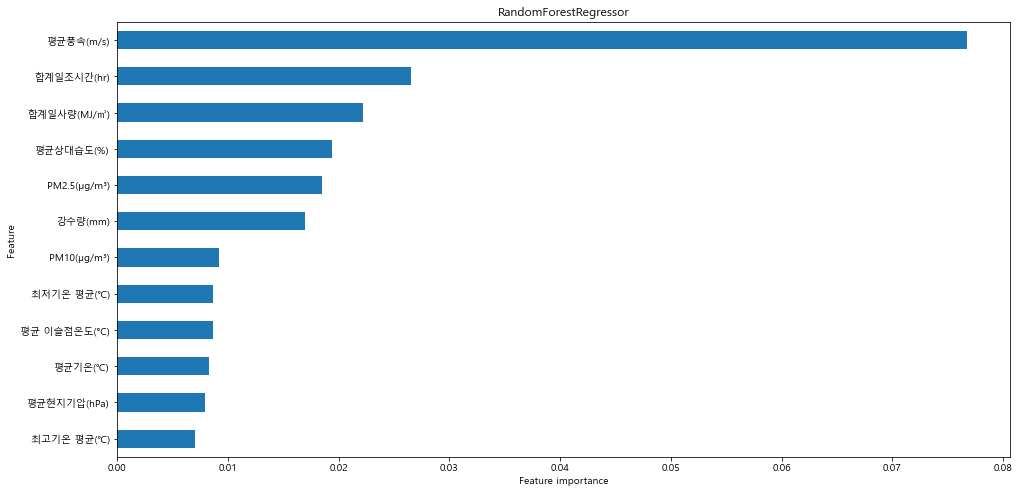

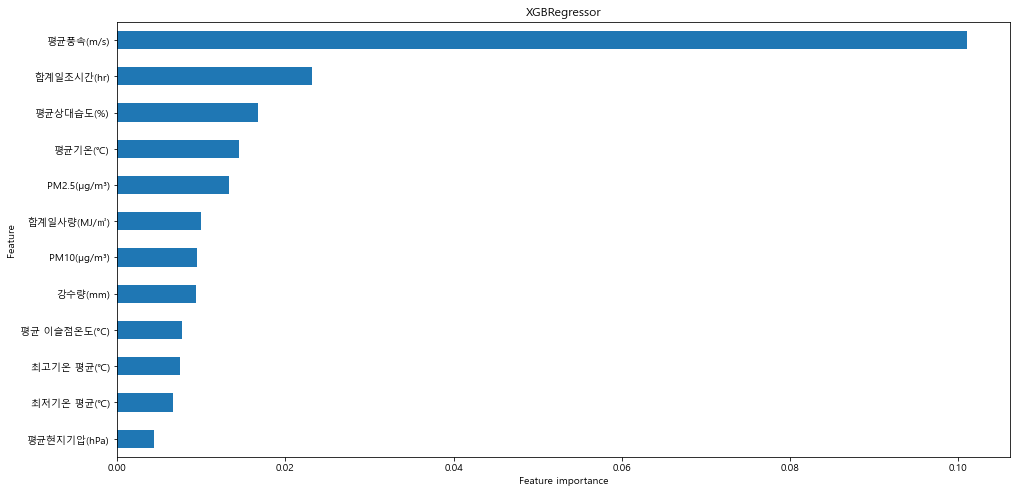

In [25]:
tree_list = reg_list[-2:]

for i in tree_list:
    feature_importance = i.feature_importances_
    Series_feat_imp = Series(feature_importance, index=X_test.columns)
    for col in X_test.columns:
        if '설비용량 합계' in col:
            del Series_feat_imp[col]


    plt.figure(figsize=(16, 8))
    Series_feat_imp.sort_values(ascending=True).plot.barh()
    plt.title(i.__class__.__name__)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()

# 특성 가중치  부여하기(Randomforest)

In [26]:
rf_imp = reg_list[-2]  #학습된 rf모델 불러오기
feature_importance = rf_imp.feature_importances_
Series_feat_imp_rf = Series(feature_importance, index=X_test.columns)
for col in X_test.columns:
    if '설비용량 합계' in col:
        del Series_feat_imp_rf[col]

In [27]:
for i in X_test.columns:  
    if data_avg.corr()['월별발전량'][i] < 0:
        Series_feat_imp_rf[i] = -Series_feat_imp_rf[i]
        
Series_feat_imp_rf

평균기온(℃)         0.008314
최고기온 평균(℃)      0.007028
최저기온 평균(℃)      0.008692
강수량(mm)         0.016993
평균 이슬점온도(°C)    0.008635
평균풍속(m/s)       0.076758
평균현지기압(hPa)     0.007988
평균상대습도(%)       0.019458
합계일조시간(hr)      0.026512
합계일사량(MJ/㎡)     0.022179
PM2.5(μg/m³)   -0.018534
PM10(μg/m³)    -0.009225
dtype: float64

In [34]:
X_mm_rf = X_mm.copy()

for i in Series_feat_imp_rf.index:
    X_mm_rf.loc[:,i] = X_mm_rf.loc[:,i]*Series_feat_imp_rf[i]
    
X_mm_rf

,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균 이슬점온도(°C),평균풍속(m/s),평균현지기압(hPa),평균상대습도(%),합계일조시간(hr),합계일사량(MJ/㎡),PM2.5(μg/m³),PM10(μg/m³),설비용량 합계
0,0.000905,0.000922,0.000810,0.000577,0.000713,0.015352,0.006338,0.009729,0.012747,0.004471,-0.005853,-0.006241,0.020843
1,0.001198,0.001188,0.001228,0.001865,0.001361,0.011940,0.007229,0.012972,0.010749,0.005654,-0.005853,-0.005427,0.020843
2,0.002763,0.002623,0.002480,0.000796,0.003001,0.022174,0.005317,0.008108,0.015124,0.009344,-0.005853,-0.006512,0.020843
3,0.004255,0.003975,0.003953,0.002250,0.004162,0.018763,0.004845,0.008756,0.014648,0.011155,-0.005853,-0.006241,0.020843
4,0.005599,0.005163,0.005206,0.000889,0.005183,0.025586,0.002750,0.007459,0.022797,0.016283,-0.005853,-0.006376,0.020843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,0.002934,0.002971,0.002382,0.000196,0.002601,0.017057,0.003955,0.007459,0.016938,0.011286,-0.005528,-0.003120,0.275975
1260,0.003717,0.003668,0.003094,0.000279,0.002793,0.023880,0.003798,0.005513,0.021031,0.014302,-0.003902,-0.003120,0.275975
1261,0.005526,0.004958,0.005328,0.000878,0.005286,0.015352,0.001964,0.010702,0.015521,0.014230,-0.003252,-0.001764,0.275975
1262,0.006847,0.005962,0.006851,0.001319,0.006462,0.010234,0.000917,0.011675,0.013048,0.013375,-0.005528,-0.002849,0.275975


In [35]:
weigth_X_rf = X_mm_rf.iloc[:,:-1]
weigth_X_rf

,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균 이슬점온도(°C),평균풍속(m/s),평균현지기압(hPa),평균상대습도(%),합계일조시간(hr),합계일사량(MJ/㎡),PM2.5(μg/m³),PM10(μg/m³)
0,0.000905,0.000922,0.000810,0.000577,0.000713,0.015352,0.006338,0.009729,0.012747,0.004471,-0.005853,-0.006241
1,0.001198,0.001188,0.001228,0.001865,0.001361,0.011940,0.007229,0.012972,0.010749,0.005654,-0.005853,-0.005427
2,0.002763,0.002623,0.002480,0.000796,0.003001,0.022174,0.005317,0.008108,0.015124,0.009344,-0.005853,-0.006512
3,0.004255,0.003975,0.003953,0.002250,0.004162,0.018763,0.004845,0.008756,0.014648,0.011155,-0.005853,-0.006241
4,0.005599,0.005163,0.005206,0.000889,0.005183,0.025586,0.002750,0.007459,0.022797,0.016283,-0.005853,-0.006376
...,...,...,...,...,...,...,...,...,...,...,...,...
1259,0.002934,0.002971,0.002382,0.000196,0.002601,0.017057,0.003955,0.007459,0.016938,0.011286,-0.005528,-0.003120
1260,0.003717,0.003668,0.003094,0.000279,0.002793,0.023880,0.003798,0.005513,0.021031,0.014302,-0.003902,-0.003120
1261,0.005526,0.004958,0.005328,0.000878,0.005286,0.015352,0.001964,0.010702,0.015521,0.014230,-0.003252,-0.001764
1262,0.006847,0.005962,0.006851,0.001319,0.006462,0.010234,0.000917,0.011675,0.013048,0.013375,-0.005528,-0.002849


In [36]:
weigth_X_rf['지역'] = region
weigth_X_rf

,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균 이슬점온도(°C),평균풍속(m/s),평균현지기압(hPa),평균상대습도(%),합계일조시간(hr),합계일사량(MJ/㎡),PM2.5(μg/m³),PM10(μg/m³),지역
0,0.000905,0.000922,0.000810,0.000577,0.000713,0.015352,0.006338,0.009729,0.012747,0.004471,-0.005853,-0.006241,강원도
1,0.001198,0.001188,0.001228,0.001865,0.001361,0.011940,0.007229,0.012972,0.010749,0.005654,-0.005853,-0.005427,강원도
2,0.002763,0.002623,0.002480,0.000796,0.003001,0.022174,0.005317,0.008108,0.015124,0.009344,-0.005853,-0.006512,강원도
3,0.004255,0.003975,0.003953,0.002250,0.004162,0.018763,0.004845,0.008756,0.014648,0.011155,-0.005853,-0.006241,강원도
4,0.005599,0.005163,0.005206,0.000889,0.005183,0.025586,0.002750,0.007459,0.022797,0.016283,-0.005853,-0.006376,강원도
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,0.002934,0.002971,0.002382,0.000196,0.002601,0.017057,0.003955,0.007459,0.016938,0.011286,-0.005528,-0.003120,충청북도
1260,0.003717,0.003668,0.003094,0.000279,0.002793,0.023880,0.003798,0.005513,0.021031,0.014302,-0.003902,-0.003120,충청북도
1261,0.005526,0.004958,0.005328,0.000878,0.005286,0.015352,0.001964,0.010702,0.015521,0.014230,-0.003252,-0.001764,충청북도
1262,0.006847,0.005962,0.006851,0.001319,0.006462,0.010234,0.000917,0.011675,0.013048,0.013375,-0.005528,-0.002849,충청북도


In [44]:
rank_rf = weigth_X_rf.groupby(['지역']).mean().sum(axis=1).sort_values(ascending = False)

In [45]:
for i in range(len(rank_rf)):
    print('{}위 : {}'.format(i+1,rank_rf.index[i]))

1위 : 제주도
2위 : 전라남도
3위 : 인천시
4위 : 부산시
5위 : 경상북도
6위 : 전라북도
7위 : 강원도
8위 : 경상남도
9위 : 대구시
10위 : 서울시
11위 : 울산시
12위 : 충청남도
13위 : 충청북도
14위 : 광주시
15위 : 대전시
16위 : 경기도


## 특성 가중치 부여하기(XGB)

In [38]:
feature_importance = reg_list[-1].feature_importances_
Series_feat_imp_xgb = Series(feature_importance, index=X_test.columns)
for col in X_test.columns:
    if '설비용량 합계' in col:
        del Series_feat_imp_xgb[col]

In [39]:
for i in X_test.columns:  
    if data_avg.corr()['월별발전량'][i] < 0:
        Series_feat_imp_xgb[i] = -Series_feat_imp_xgb[i]
        
Series_feat_imp_xgb

평균기온(℃)         0.014534
최고기온 평균(℃)      0.007517
최저기온 평균(℃)      0.006675
강수량(mm)         0.009449
평균 이슬점온도(°C)    0.007765
평균풍속(m/s)       0.101046
평균현지기압(hPa)     0.004444
평균상대습도(%)       0.016713
합계일조시간(hr)      0.023144
합계일사량(MJ/㎡)     0.009945
PM2.5(μg/m³)   -0.013292
PM10(μg/m³)    -0.009468
dtype: float32

In [40]:
X_mm_xgb = X_mm.copy()

for i in Series_feat_imp_xgb.index:
    X_mm_xgb.loc[:,i] = X_mm_xgb.loc[:,i]*Series_feat_imp_xgb[i]
    
X_mm_xgb

,평균기온(℃),최고기온 평균(℃),최저기온 평균(℃),강수량(mm),평균 이슬점온도(°C),평균풍속(m/s),평균현지기압(hPa),평균상대습도(%),합계일조시간(hr),합계일사량(MJ/㎡),PM2.5(μg/m³),PM10(μg/m³),설비용량 합계
0,0.001582,0.000986,0.000622,0.000321,0.000641,0.020209,0.003526,0.008357,0.011128,0.002005,-0.004197,-0.006405,0.020843
1,0.002095,0.001271,0.000943,0.001037,0.001224,0.015718,0.004021,0.011142,0.009383,0.002535,-0.004197,-0.005570,0.020843
2,0.004831,0.002805,0.001905,0.000443,0.002698,0.029191,0.002958,0.006964,0.013202,0.004190,-0.004197,-0.006683,0.020843
3,0.007438,0.004251,0.003036,0.001251,0.003742,0.024700,0.002695,0.007521,0.012787,0.005002,-0.004197,-0.006405,0.020843
4,0.009789,0.005522,0.003998,0.000494,0.004661,0.033682,0.001530,0.006407,0.019901,0.007301,-0.004197,-0.006544,0.020843
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,0.005130,0.003178,0.001829,0.000109,0.002339,0.022455,0.002200,0.006407,0.014786,0.005061,-0.003964,-0.003202,0.275975
1260,0.006498,0.003923,0.002376,0.000155,0.002512,0.031437,0.002113,0.004735,0.018360,0.006413,-0.002798,-0.003202,0.275975
1261,0.009661,0.005303,0.004092,0.000488,0.004753,0.020209,0.001093,0.009192,0.013550,0.006381,-0.002332,-0.001810,0.275975
1262,0.011970,0.006377,0.005261,0.000734,0.005811,0.013473,0.000510,0.010028,0.011390,0.005997,-0.003964,-0.002924,0.275975


In [41]:
weigth_X_xgb = X_mm_xgb.iloc[:,:-1]
weigth_X_xgb['지역'] = region

In [42]:
rank_xgb = weigth_X_xgb.groupby(['지역']).mean().sum(axis=1).sort_values(ascending = False)

In [43]:
for i in range(len(rank_xgb)):
    print('{}위 : {}'.format(i+1,rank_xgb.index[i]))

1위 : 제주도
2위 : 부산시
3위 : 인천시
4위 : 전라남도
5위 : 경상북도
6위 : 서울시
7위 : 대구시
8위 : 울산시
9위 : 전라북도
10위 : 강원도
11위 : 경상남도
12위 : 충청남도
13위 : 충청북도
14위 : 광주시
15위 : 경기도
16위 : 대전시


In [83]:
df_X

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),평균 현지기압(hPa),합계 일조시간(hr),합계 일사량(MJ/m2),평균 전운량(1/10),...,지점명_대전시,지점명_부산시,지점명_서울시,지점명_울산시,지점명_인천시,지점명_전라남도,지점명_전라북도,지점명_제주도,지점명_충청남도,지점명_충청북도
0,4.0,0.3,7.9,0.0,-5.5,51.3,1003.6,6.4,6.17,2.1,...,0,0,1,0,0,0,0,0,0,0
1,1.5,-1.3,6.2,0.0,-12.9,35.4,1010.4,9.0,9.18,0.3,...,0,0,1,0,0,0,0,0,0,0
2,2.3,-1.1,7.3,0.0,-6.2,54.4,1006.9,2.7,4.69,4.6,...,0,0,1,0,0,0,0,0,0,0
3,-0.1,-3.7,5.6,0.0,-10.3,47.1,1008.8,8.7,8.14,0.9,...,0,0,1,0,0,0,0,0,0,0
4,-0.8,-4.3,3.8,0.0,-10.7,48.4,1013.1,8.0,7.08,2.1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38459,22.1,19.8,24.8,3.4,20.1,88.6,993.5,0.0,8.59,9.8,...,0,0,0,0,0,0,0,0,0,0
38460,22.1,20.7,24.2,17.7,20.5,91.1,995.5,0.0,5.01,9.8,...,0,0,0,0,0,0,0,0,0,0
38461,22.4,21.1,23.8,16.6,21.1,92.3,997.6,0.0,4.59,10.0,...,0,0,0,0,0,0,0,0,0,0
38462,22.4,20.8,25.9,65.2,21.1,92.6,998.4,1.0,5.48,8.9,...,0,0,0,0,0,0,0,0,0,0


In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf



hello
